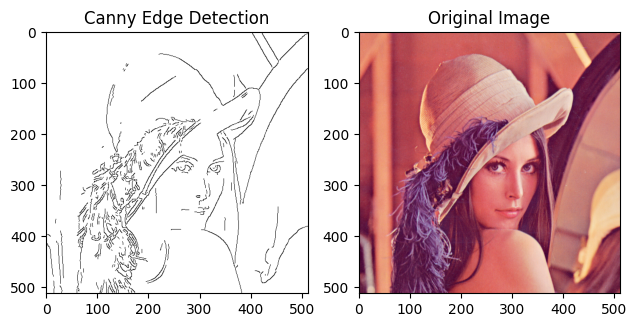

In [23]:
%matplotlib inline
# Canny Method
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)
#threshold1, threshhold2 = 5, 95
threshold1, threshhold2 = 95, 110
r_canny = 255 - cv2.Canny(g_gray, threshold1, threshhold2, apertureSize = 3, L2gradient = True) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(r_canny, cmap='gray')
axs[0].set_title('Canny Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()

News

OpenAI、ターミナル用AIエージェント「Codex CLI」をOSSで公開 

主な特徴と機能：
・コード理解・編集,コマンド実行,アプリ構築をターミナルで完結
・マルチモーダル対応
・手書きスケッチ、Figma等から直接Webアプリ等を実装可能
・npmで即時インストール可

In [ ]:
%matplotlib inline
# Sobel Method
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel フィルターの適用
sobel_x = cv2.Sobel(g_gray, cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
sobel_y = cv2.Sobel(g_gray, cv2.CV_32F, dx = 0, dy = 1, ksize = 3)

# 勾配の絶対値を計算
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# x, y 方向の勾配を合成
sobel_all = 255 - cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(sobel_all, cmap='gray')
axs[0].set_title('Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img = cv2.imread("ng_images/ngimage_0.jpg")
#print("img.shape", img.shape)

new_width  = 125
new_height = 125
dsize      = (new_width, new_height)
new_image  = cv2.resize(img, dsize)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img              = cv2.imread("ng_images/ngimage_0.jpg")
#print("img.shape", img.shape)
original_height, original_width = img.shape[:2]
aspect_ratio     = original_width / original_height
target_width     = 100
transform_height = int(target_width * aspect_ratio)
dsize            = (target_width, transform_height)
new_image        = cv2.resize(img, dsize, interpolation=cv2.INTER_AREA)
print("new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

#img              = cv2.imread("ng_images/ngimage_0.jpg")
img              = cv2.imread("photo/img2.jpg")
#print("img.shape", img.shape)
scale_percent_x, scale_percent_y = 0.4 , 0.4 # 40%縮小
new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y, interpolation=cv2.INTER_AREA)
#cv2.imwrite("photo/img2_resized.jpg", new_image)
print("new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img              = cv2.imread("photo/img2.jpg")
print("original img.shape", img.shape)
scale_percent_x, scale_percent_y = 2.0 , 2.0 # 40%縮小
new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y, interpolation=cv2.INTER_CUBIC)
#new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y)
cv2.imwrite("photo/img2_resized.jpg", new_image)
print("resize new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

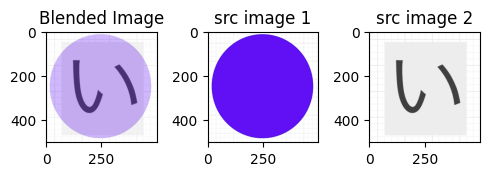

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img_src1 = cv2.imread("fig_20250417_1.png")
img_src2 = cv2.imread("fig_20250417_2.png")

IMAGE_SIZE = (500, 500)
img_src1 = cv2.resize(img_src1, IMAGE_SIZE)
img_src2 = cv2.resize(img_src2, IMAGE_SIZE)

# アルファブレンディングのパタメータ
alpha = 0.7
beta  = 1.0 - alpha
gamma = 0.5

blend_image = cv2.addWeighted(img_src2, alpha, img_src1, beta, gamma)

fig, ax = plt.subplots(1, 3, figsize=(5, 2))
ax[0].imshow(cc(blend_image))  
ax[0].set_title('Blended Image')
ax[1].imshow(cc(img_src1))
ax[1].set_title('src image 1')
ax[2].imshow(cc(img_src2))
ax[2].set_title('src image 2')
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img_src2 = cv2.imread("fig_20250417_2.png")

IMAGE_SIZE = (100, 100)
img_src2 = cv2.resize(img_src2, IMAGE_SIZE)

fig, ax = plt.subplots(1, 1, figsize=(4, 1))
ax.imshow(cc(img_src2))  
ax.set_title('src2 Image: 100x100')
plt.show()

y : 150 ~ 400
x : 100 ~ 450
text :  logo src2, roi : src1
x, y ともに100

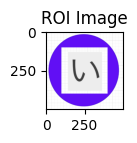

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img_src1 = cv2.imread("fig_20250417_1.png")
img_src2 = cv2.imread("fig_20250417_2.png")

SRC1_IMAGE_SIZE = (500, 500)
SRC2_IMAGE_SIZE = (300, 300)
img_src1 = cv2.resize(img_src1, SRC1_IMAGE_SIZE)
img_src2 = cv2.resize(img_src2, SRC2_IMAGE_SIZE)

roi_y_stat = 100
roi_x_stat = 100

rot_height, rot_width = img_src2.shape[:2]
roi_y_end = roi_y_stat + rot_height
roi_x_end = roi_x_stat + rot_width

img_src1[roi_y_stat:roi_y_end, roi_x_stat:roi_x_end] = img_src2

fig, ax = plt.subplots(1, 1, figsize=(4, 1))
ax.imshow(cc(img_src1))  
ax.set_title('ROI Image')
plt.show()


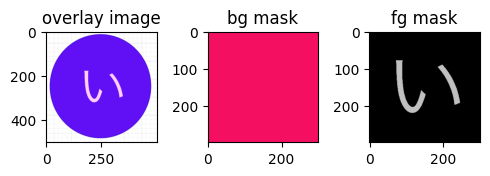

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img_src1 = cv2.imread("fig_20250417_1.png")
img_src2 = cv2.imread("fig_20250417_2.png")

SRC1_IMAGE_SIZE = (500, 500)
SRC2_IMAGE_SIZE = (300, 300)
img_src1 = cv2.resize(img_src1, SRC1_IMAGE_SIZE)
img_src2 = cv2.resize(img_src2, SRC2_IMAGE_SIZE)

roi_y_stat = 100
roi_x_stat = 100

rows, cols = img_src2.shape[:2]
y_end, x_end = roi_y_stat + rows, roi_x_stat + cols

img_src2_rgb = img_src2
img_src2_gray = cv2.cvtColor(img_src2_rgb, cv2.COLOR_BGR2GRAY)

# debug
#fig, ax = plt.subplots(1, 1, figsize=(4, 1))
#ax.imshow(cc(img_src2_gray))  
#ax.set_title('src2 gray image')
#plt.show()

ret, mask = cv2.threshold(img_src2_gray, 110, 150, cv2.THRESH_BINARY_INV)
#print("mask = ", mask)
roi = img_src1[roi_y_stat:y_end, roi_x_stat:x_end]

mask_inv = cv2.bitwise_not(mask)

bg_mask = cv2.bitwise_and(roi, roi, mask = mask_inv)

#fg_mask = cv2.bitwise_and(img_src2_rgb, img_src2_rgb, mask = mask)
fg_mask = cv2.bitwise_not(img_src2_gray, mask = mask)
fg_mask = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)

#dst = cv2.add(bg_mask, fg_mask)
dst = cv2.add(bg_mask, fg_mask)

img_src1[roi_y_stat:y_end, roi_x_stat:x_end] = dst

fig, ax = plt.subplots(1, 3, figsize=(5, 2))
ax[0].imshow(cc(img_src1))  
ax[0].set_title('overlay image')
ax[1].imshow(bg_mask)
ax[1].set_title('bg mask')
ax[2].imshow(fg_mask)
ax[2].set_title('fg mask')
plt.tight_layout()
plt.show()